In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 100000 # Number of episodes
side = 8

In [4]:
# Agent/Environment initialization

In [5]:
env = Environment.square(initial_state_range=1, side = side)

#agent = Agent(GAMMA = 1)
BETA = 15
ALPHA_REF = 1e-3
OBS_LEAK = 1e-2 / env.N_obs

agent = Agent(env, GAMMA=1, ALPHA=ALPHA_REF / BETA, BETA=BETA, do_reward = True)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)


#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)


{0: {'S': 8, 'E': 1}, 1: {'S': 9, 'E': 2, 'W': 0}, 2: {'S': 10, 'E': 3, 'W': 1}, 3: {'S': 11, 'E': 4, 'W': 2}, 4: {'S': 12, 'E': 5, 'W': 3}, 5: {'S': 13, 'E': 6, 'W': 4}, 6: {'S': 14, 'E': 7, 'W': 5}, 7: {'S': 15, 'W': 6}, 8: {'S': 16, 'E': 9, 'N': 0}, 9: {'S': 17, 'E': 10, 'N': 1, 'W': 8}, 10: {'S': 18, 'E': 11, 'N': 2, 'W': 9}, 11: {'S': 19, 'E': 12, 'N': 3, 'W': 10}, 12: {'S': 20, 'E': 13, 'N': 4, 'W': 11}, 13: {'S': 21, 'E': 14, 'N': 5, 'W': 12}, 14: {'S': 22, 'E': 15, 'N': 6, 'W': 13}, 15: {'S': 23, 'W': 14, 'N': 7}, 16: {'S': 24, 'E': 17, 'N': 8}, 17: {'S': 25, 'E': 18, 'N': 9, 'W': 16}, 18: {'S': 26, 'E': 19, 'N': 10, 'W': 17}, 19: {'S': 27, 'E': 20, 'N': 11, 'W': 18}, 20: {'S': 28, 'E': 21, 'N': 12, 'W': 19}, 21: {'S': 29, 'E': 22, 'N': 13, 'W': 20}, 22: {'S': 30, 'E': 23, 'N': 14, 'W': 21}, 23: {'S': 31, 'W': 22, 'N': 15}, 24: {'S': 32, 'E': 25, 'N': 16}, 25: {'S': 33, 'E': 26, 'N': 17, 'W': 24}, 26: {'S': 34, 'E': 27, 'N': 18, 'W': 25}, 27: {'S': 35, 'E': 28, 'N': 19, 'W': 26

In [6]:
if True:
    mem_pi = []
    mem_KL = []
    mem_TD = []
for i in range(N):
    trainer.run_episode()
    past_obs = trainer.trajectory[-2]
    past_action = trainer.action_history[-1]
    obs = trainer.trajectory[-1]
    reward = trainer.reward_history[-1]
    mem_pi += [trainer.agent.softmax(past_obs)[past_action]]
    mem_KL += [trainer.KL(past_obs,past_action,obs,done=True)]
    mem_TD += [trainer.TD_err_var(past_obs,past_action,obs,reward,done=True)]
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("past_obs :", past_obs, ", final Q:", trainer.agent.Q_var[past_obs])
        print("final policy :", trainer.agent.softmax(past_obs))
        print("Final reward: ", reward)
        print("final KL :", trainer.KL(past_obs,past_action,obs,done=True))
        print("final TD error :", trainer.TD_err_var(past_obs,past_action,obs,reward,done=True))

1
Trajectory:  [0, 8, 16, 8, 9, 8, 9, 10, 2, 1, 2, 10, 2, 3, 2]
past_obs : 3 , final Q: [ 0.          0.         -0.00145943  0.        ]
final policy : [ 0.25136072  0.25136072  0.24591785  0.25136072]
Final reward:  0
final KL : 1.94591014906
final TD error : 0.00145943261179
1001
Trajectory:  [0, 8, 9, 8, 16, 17, 16, 24, 32, 33, 32, 33, 41, 49, 57]
past_obs : 49 , final Q: [ 0.0032409   0.00357689  0.00144328  0.0027889 ]
final policy : [ 0.25178188  0.25305404  0.24508348  0.2500806 ]
Final reward:  0
final KL : -2.06794949532
final TD error : -0.003576891686
2001
Trajectory:  [0, 0, 0, 0, 8, 0, 0, 1, 1, 0, 1, 2, 1, 9, 1]
past_obs : 9 , final Q: [-0.15926492 -0.16279544 -0.2014015  -0.20111769]
final policy : [ 0.331819    0.31470381  0.17636239  0.1771148 ]
Final reward:  0
final KL : 0.593779065019
final TD error : 0.2011176896
3001
Trajectory:  [0, 1, 0, 0, 0, 1, 2, 3, 2, 10, 18, 26, 18, 26, 27]
past_obs : 26 , final Q: [-0.00593214  0.01102678 -0.04359194 -0.05553796]
final pol

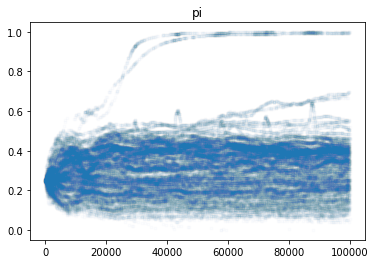

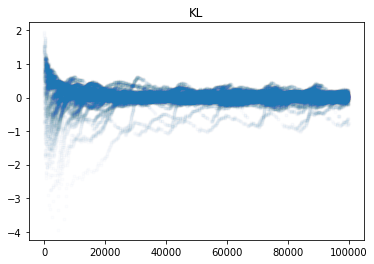

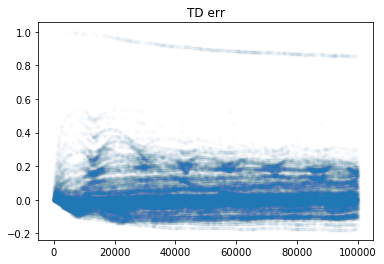

In [7]:
plt.plot(mem_pi,'.', alpha = 0.01)
plt.title('pi')
plt.show()
plt.plot(mem_KL,'.', alpha = 0.01)
plt.title('KL')
plt.show()
plt.plot(mem_TD,'.', alpha = 0.01)
plt.title('TD err')
plt.show()


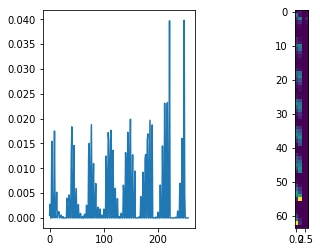

In [8]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)
plt.show()

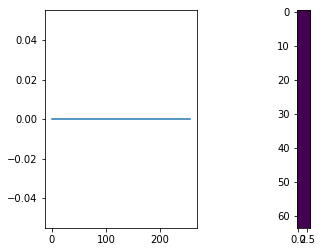

In [9]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)
plt.show()

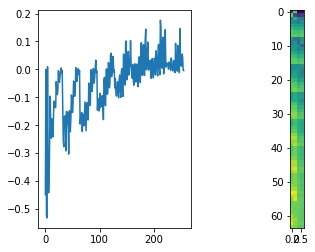

In [10]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)
plt.show()

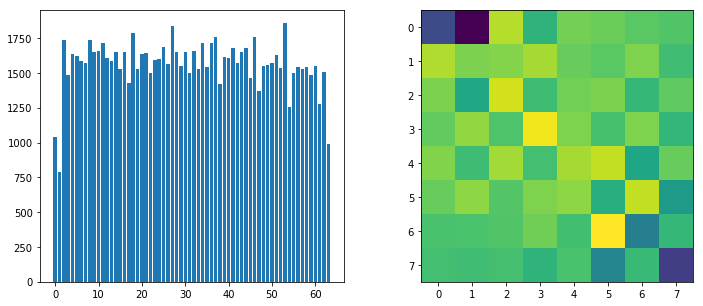

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))
plt.show()

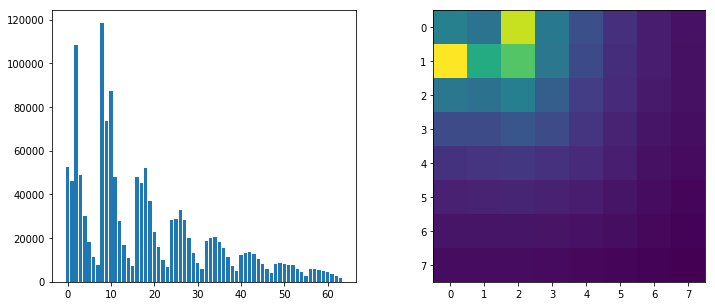

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))
plt.show()

[  46.11683597   52.80434855  105.47393484  107.48769052  116.89669674
  114.78343252  109.87650489   98.28654017   83.48431207  106.36963234
   93.02040154  108.13141956   96.15127697  106.06055296  101.95426099
  100.70322889   95.96582672  102.34483077  106.50142125   84.17026065
   91.62073262   94.13653221   97.28354254   97.56544951   98.50871949
  110.02015005   82.85848197  121.21701174  102.24618572   99.86564764
   98.93048037   93.21964971  114.22125373   93.10203538  112.92613872
   95.02641641  105.94629085  111.44033573   94.93914159  100.79588209
   94.60449768  101.7633015   106.04379662  110.70316276   96.95356153
   83.39412625  111.23660693  107.06845539  100.68769181   92.34899501
   92.24011816  106.64519102   90.58106932  122.95140094   78.59694404
  122.06549303  102.56494669  103.01719457  113.8375011   103.72291622
  100.89390056   97.40636225  116.59206587   91.62616709]


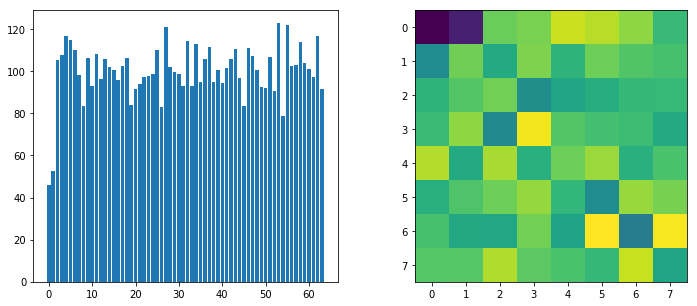

In [13]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))
plt.show()

[ 164.09209571  241.40899502  565.87168054  195.39286159  115.73043849
   65.04851017   42.48951316   22.64370827  489.7700193   390.23535119
  501.13595235  209.57435104  111.77240918   69.06346945   45.97647506
   31.02215476  195.13865167  248.00560536  317.29074853  170.72561664
   97.11453162   61.45039143   36.10104736   26.61419979   95.34582221
  146.14207661  173.45637305  112.59060586   79.97042188   62.77423876
   36.03855143   24.05738908   73.78784879   97.22145168  103.89461416
   80.08696161   58.06615577   50.78594991   31.17431693   24.23257786
   56.78001762   56.90367569   67.06147488   51.56686233   43.37750929
   33.87879692   20.04649808   17.55851464   37.64727488   32.61575328
   38.91692372   38.29145369   31.06111821   21.5122537    17.40210663
   12.53223714   31.84801636   29.79522839   22.94631536   25.35449821
   16.73936267   12.02657214   11.75525615    9.08814674]


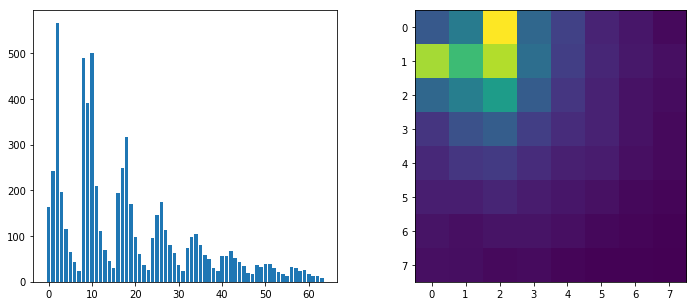

In [14]:
print(trainer.obs_score)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))
plt.show()

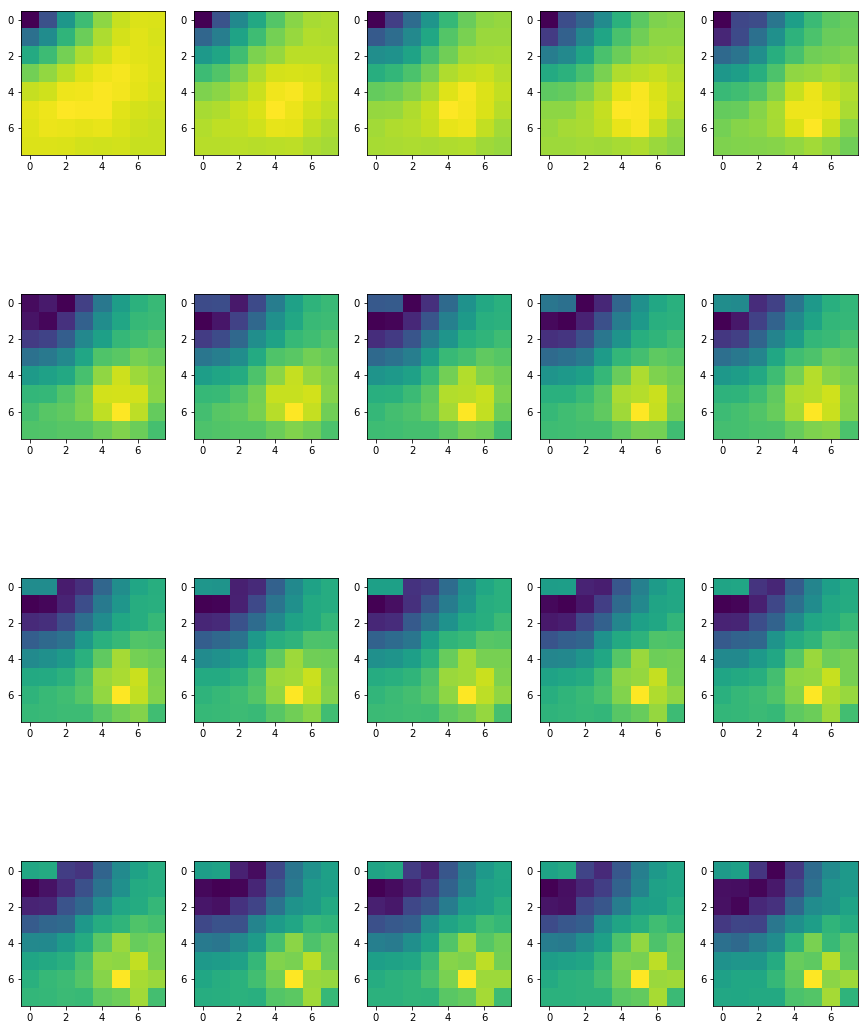

In [15]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))
plt.show()